# Adding libraries

In [98]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os
from time import perf_counter 

In [33]:
tf.__version__

'2.3.0'

# Data preprocessing phase

In [34]:
os.chdir ('D:/New Plant Diseases Dataset(Augmented)')
os.getcwd()

'D:\\New Plant Diseases Dataset(Augmented)'

In [44]:
batch_size = 100
img_height = 250
img_width = 250
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 70295 files belonging to 38 classes.


In [52]:

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)
class_names = training_ds.class_names

Found 17572 files belonging to 38 classes.


# Part 2 - Building the CNN

In [55]:

Cnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(38, activation= 'softmax')
])


In [56]:
Cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the CNN

In [58]:
retVal = Cnn.fit(training_ds,validation_data= validation_ds,epochs = 5)

Epoch 1/5
703/703 [==============================] - 4971s 7s/step - loss: 1.0789 - accuracy: 0.6931 - val_loss: 0.5585 - val_accuracy: 0.8272
Epoch 2/5
703/703 [==============================] - 4581s 7s/step - loss: 0.3720 - accuracy: 0.8821 - val_loss: 0.3083 - val_accuracy: 0.9013
Epoch 3/5
703/703 [==============================] - 3701s 5s/step - loss: 0.1979 - accuracy: 0.9357 - val_loss: 0.2715 - val_accuracy: 0.9186
Epoch 4/5
703/703 [==============================] - 3746s 5s/step - loss: 0.1157 - accuracy: 0.9607 - val_loss: 0.2737 - val_accuracy: 0.9225
Epoch 5/5
703/703 [==============================] - 3719s 5s/step - loss: 0.0882 - accuracy: 0.9705 - val_loss: 0.3291 - val_accuracy: 0.9109


# Postwork

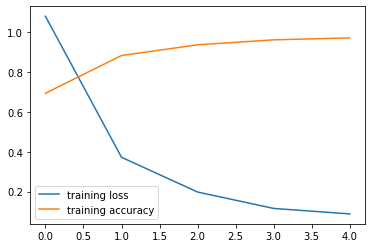

In [59]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [62]:
Cnn.save('project.h5')

# Performance

In [101]:
start = perf_counter() 
_, accuracy = Cnn.evaluate(validation_ds, verbose = 0 )
end = perf_counter() 

sizecnn = os.path.getsize('project.h5')
sizecnn = sizecnn / (1024 * 1024)

print ('model Summary:')
print('Model size(MB) : {}'.format(sizecnn))
print('Time on Validation data (sec) : {}'.format(end - start))
print('Accuracy on validation data: {}'.format(accuracy))

model Summary:
Model size(MB) : 316.6161422729492
Time on Validation data (sec) : 268.1705623000016
Accuracy on validation data: 0.9108809232711792
